In [1]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array

2023-11-24 09:57:53.084762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = Path('dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [3]:
test_dir = Path('dataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [4]:
val_dir = Path('dataset/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [5]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [6]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [7]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['pear' 'raddish' 'garlic' 'peas' 'pomegranate' 'sweetpotato' 'lettuce'
 'tomato' 'sweetcorn' 'cucumber' 'jalepeno' 'eggplant' 'carrot'
 'watermelon' 'turnip' 'chilli pepper' 'pineapple' 'cauliflower' 'potato'
 'cabbage' 'capsicum' 'orange' 'bell pepper' 'soy beans' 'corn' 'apple'
 'ginger' 'spinach' 'kiwi' 'banana' 'onion' 'beetroot' 'lemon' 'grapes'
 'mango' 'paprika']


In [8]:
train_df.head(5)

,Filepath,Label
0,dataset/train/pear/Image_78.jpg,pear
1,dataset/train/raddish/Image_81.jpg,raddish
2,dataset/train/garlic/Image_99.jpg,garlic
3,dataset/train/peas/Image_68.jpg,peas
4,dataset/train/pear/Image_93.jpg,pear


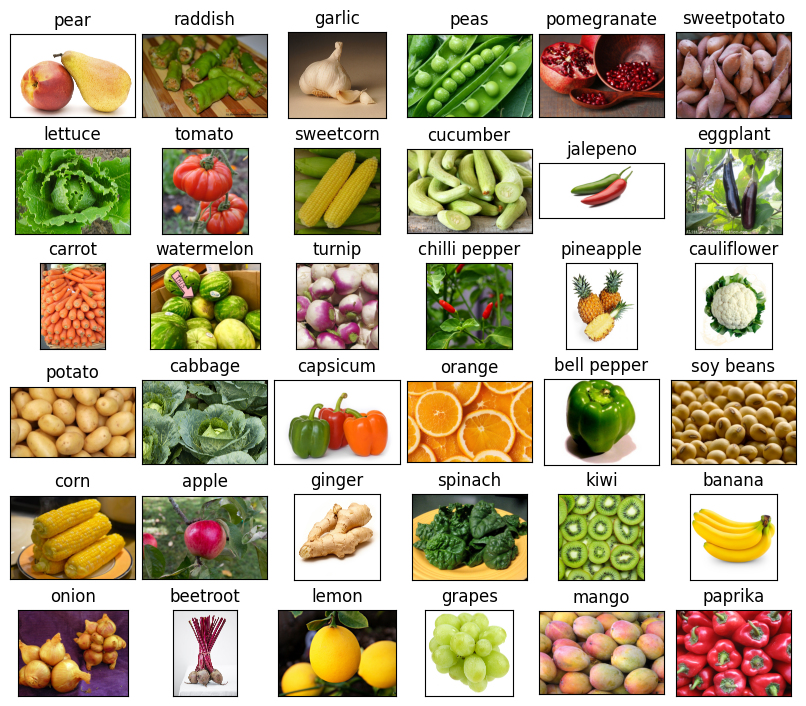

In [9]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [11]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [12]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [13]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [14]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

Epoch 1/5


2023-11-24 09:58:05.587935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


87/87 [==============================] - ETA: 0s - loss: 1.7924 - accuracy: 0.5281

2023-11-24 09:59:38.811002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


87/87 [==============================] - 108s 1s/step - loss: 1.7924 - accuracy: 0.5281 - val_loss: 0.4769 - val_accuracy: 0.8533
Epoch 2/5
87/87 [==============================] - 102s 1s/step - loss: 0.5777 - accuracy: 0.8169 - val_loss: 0.2686 - val_accuracy: 0.9102
Epoch 3/5
87/87 [==============================] - 105s 1s/step - loss: 0.3327 - accuracy: 0.8932 - val_loss: 0.2059 - val_accuracy: 0.9311
Epoch 4/5
87/87 [==============================] - 107s 1s/step - loss: 0.2079 - accuracy: 0.9349 - val_loss: 0.1610 - val_accuracy: 0.9461
Epoch 5/5
87/87 [==============================] - 107s 1s/step - loss: 0.1469 - accuracy: 0.9550 - val_loss: 0.1524 - val_accuracy: 0.9641
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                              

                                                                  'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, 56, 56, 144)  3456        ['block_2_add[0][0]']            
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, 56, 56, 144)  576        ['block_3_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
          

 malization)                                                                                      
                                                                                                  
 block_6_depthwise_relu (ReLU)  (None, 14, 14, 192)  0           ['block_6_depthwise_BN[0][0]']   
                                                                                                  
 block_6_project (Conv2D)       (None, 14, 14, 64)   12288       ['block_6_depthwise_relu[0][0]'] 
                                                                                                  
 block_6_project_BN (BatchNorma  (None, 14, 14, 64)  256         ['block_6_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
          

 block_10_expand_relu (ReLU)    (None, 14, 14, 384)  0           ['block_10_expand_BN[0][0]']     
                                                                                                  
 block_10_depthwise (DepthwiseC  (None, 14, 14, 384)  3456       ['block_10_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_10_depthwise_BN (BatchNo  (None, 14, 14, 384)  1536       ['block_10_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_

 block_14_expand (Conv2D)       (None, 7, 7, 960)    153600      ['block_13_project_BN[0][0]']    
                                                                                                  
 block_14_expand_BN (BatchNorma  (None, 7, 7, 960)   3840        ['block_14_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_14_expand_relu (ReLU)    (None, 7, 7, 960)    0           ['block_14_expand_BN[0][0]']     
                                                                                                  
 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_

Total params: 2,443,108
Trainable params: 185,124
Non-trainable params: 2,257,984
__________________________________________________________________________________________________


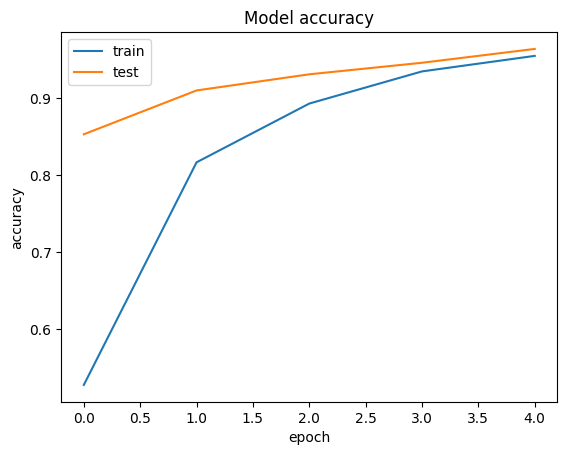

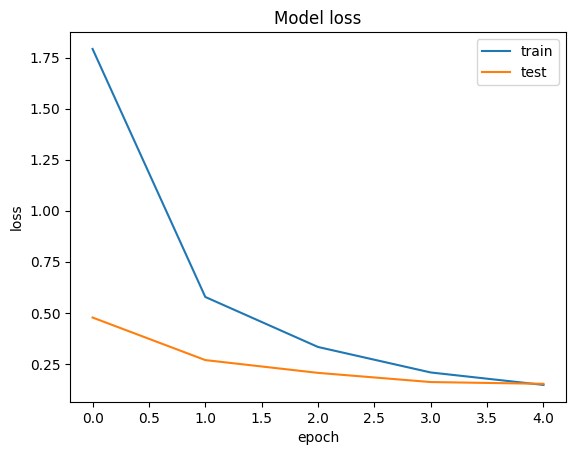

In [15]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)
model.summary()

#View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

plt.show()

In [16]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

2023-11-24 10:06:56.272847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 15s 1s/step


['pineapple',
 'grapes',
 'cauliflower',
 'jalepeno',
 'capsicum',
 'spinach',
 'jalepeno',
 'lettuce',
 'grapes',
 'sweetcorn',
 'kiwi',
 'raddish',
 'tomato',
 'pomegranate',
 'sweetcorn',
 'tomato',
 'orange',
 'cauliflower',
 'corn',
 'lettuce',
 'pomegranate',
 'capsicum',
 'grapes',
 'watermelon',
 'paprika',
 'sweetcorn',
 'cauliflower',
 'paprika',
 'sweetpotato',
 'pineapple',
 'paprika',
 'cauliflower',
 'potato',
 'peas',
 'chilli pepper',
 'corn',
 'cauliflower',
 'raddish',
 'sweetpotato',
 'sweetcorn',
 'ginger',
 'cucumber',
 'paprika',
 'eggplant',
 'soy beans',
 'turnip',
 'pineapple',
 'tomato',
 'jalepeno',
 'pear',
 'beetroot',
 'jalepeno',
 'mango',
 'pear',
 'chilli pepper',
 'turnip',
 'tomato',
 'potato',
 'pomegranate',
 'apple',
 'sweetcorn',
 'raddish',
 'pear',
 'beetroot',
 'lettuce',
 'turnip',
 'lemon',
 'orange',
 'eggplant',
 'beetroot',
 'lettuce',
 'banana',
 'lemon',
 'bell pepper',
 'bell pepper',
 'watermelon',
 'apple',
 'lettuce',
 'carrot',
 'on

In [17]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [18]:
img = output('dataset/test/banana/Image_1.jpg')
img

1/1 [==============================] - 1s 921ms/step


'banana'

In [19]:
model.save('Fruits_Vegetable_Recognition_Model.h5')

In [28]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
#ypred = model.predict(test_images)
#pred_array = np.array(pred)
#accuracy = accuracy_score(pred_array, pred1)
#print(accuracy)
#evali = model.evaluate(test_images)
#print(evali)
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
#preda = model.predict(test_images)
pred2 = [labels[k] for k in pred] 
y_test = [labels[k] for k in test_images.classes]
from sklearn.metrics import accuracy_score
acc = recall_score(y_test, pred2,average=None,zero_division=1)
print(f'Accuracy on the test set: {100*acc:.2f}%')

TypeError: unsupported format string passed to numpy.ndarray.__format__